In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

from scipy import optimize as sp_optimize
from scipy.spatial.distance import pdist as sp_dist
from scipy.spatial.distance import squareform as sp_squareform

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

Rather than fixing the covariance, the parameters for the covariance can be inferred from the data.

These parameters govern things like
* length-scale of the correlations
* precision of the noise

and as such correspond to the hyperparametrs of the standard parametric model


We need to evaluate the likelihood function $p(\tb \mid \thetab)$ where $\thetab$ denotes the hyperparameters of the GP model.  

simplest approach is to make a point estimate of $\thetab$ by maximizing the log likelihood function.

since $\thetab$ represents the set of hyperparameters of the regressoin problem, this is analogous to type 2 ML for linear regression.

Maximizatio of the log likelihood can be done using efficient gradient-based optimization algos such as conjugate gradients

Since the mean of the marginal is 
$\Nl{t}{\Ab \mub + \bb}{\Lbi + \Ab \Li \At}$, we have

$$
p(\tb) = \Nl{\tb}{\zerob}{\inv{\beta}\I_N + \Kb}
= \Nl{\tb}{\zerob}{\Cb}
$$

where the covariance is
$$
\Cb(\xbn, \xbm) = \inv{\beta} \delta_{nm} + \kappa(\xbn, \xbm)
$$

the log likelihood is then
$$
\ln p(\tb \mid \thetab)
=
-\half \ln \Mod{\Cn}
-\half \tt \inv{\Cn} \tb
-\frachalf{N} \ln(2\pi)
$$

* the first term is the complexity penalty term
* The second term a negative quadratic, and plays the role of a data-fit measure
* The third term is a log normalization term, independent of the data, and not very interesting

from \citeme{Gaussian Processes in Machine Learning - Carl Edward Rasmussen}

Because ln p(t | **θ**) will in general be a nonconvex function, it can have multiple maxima.

remember
$$
\arrthree{
\Partial{}{x} \Mod{\Ab} &= \trace{ \inv{\Ab} \Partial{\Ab}{x}}
\\
\Partial{}{x} \inv{\Ab} &= -\inv{\Ab} \Partial{\Ab}{x} \inv{\Ab}
}
$$

$$
\arrthree{
\Partial{}{\xb} (\Ab \Ai)
&=
\Partial{\Ab}{\xb}\Ai  + \Ab \Partial{\Ai}{\xb} = 0
}
$$

Thus
$$
\Partial{}{\theta_i} \ln p(\tb \mid \thetab)
=
-\half \trace{\inv{\Cn} \Partial{\Cn}{\theta_i}}
+ \half \tt \inv{\Cn} \Partial{\Cn}{\theta_i} \inv{\Cn} \tb
$$

Because $\ln p(\tb \mid \thetab)$ will in general be a nonconvex function, it can have multiple maxima.

It is straightforward to introduce a prior over **θ** and to maximize the log posterior using gradient-based methods. In a fully Bayesian treatment, we need to evaluate marginals over **θ** weighted by the product of the prior p(**θ**) and the likelihood function p(**t**|**θ**). In general, however, exact marginalization will be intractable, and we
must resort to approximations.



# Example - cg

seek the minimum value of the expression
$au^2 + buv + cv^2 + du + ev + f$ for given values of the parameters and an initial guess (u, v) = (0, 0).

In [2]:
args = (2, 3, 7, 8, 9, 10)  # parameter values

def f(x, *args):
    u, v = x
    a, b, c, d, e, f = args
    return a*u**2 + b*u*v + c*v**2 + d*u + e*v + f

def gradf(x, *args):
    u, v = x
    a, b, c, d, e, f = args
    gu = 2*a*u + b*v + d	 # u-component of the gradient
    gv = b*u + 2*c*v + e	 # v-component of the gradient
    return np.asarray((gu, gv))

x0 = np.asarray((0, 0))	 # Initial guess.

from scipy import optimize

res1 = optimize.fmin_cg(f, x0, fprime=gradf, args=args)

print('res1 = ', res1)

Optimization terminated successfully.
         Current function value: 1.617021
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
res1 =  [-1.80851064 -0.25531915]


# Example

$$
\ln p(\tb \mid \thetab)
=
-\half \ln \Mod{\Cn}
-\half \tt \inv{\Cn} \tb
-\frachalf{N} \ln(2\pi)
$$

$$
\arrthree{
\Partial{}{\theta_i} \ln p(\tb \mid \thetab)
&=
-\half \trace{\inv{\Cn} \Partial{\Cn}{\theta_i}}
+ \half \tt \inv{\Cn} \Partial{\Cn}{\theta_i} \inv{\Cn} \tb
}
$$

Consider the rbf kernel with just the length-scale parameter $\sigma$

$$
\Cb_{n,m} = \kappa(\xbn, \xbm) =
\expb{-\frac{\Norm{\xbn-\xbm}^2}{2\sigma^2}}
$$

$$
\arrthree{
\Partial{}{\sigma} \Cb_{n,m}
&=
\expb{-\frac{\Norm{\xbn-\xbm}^2}{2\sigma^2}}
 ~\frac{\Norm{\xbn-\xbm}^2}{\sigma^3}
\\ &
=
\Bracket{\expb{-\frac{\Norm{\xbn-\xbm}^2}{2}}}^{(1/\sigma^2)}
~\Norm{\xbn-\xbm}^2 ~\fracrec{\sigma^3}
}
$$

$$
\arrthree{
A_{n,m} &= \expb{-\frac{\Norm{\xbn-\xbm}^2}{2}} \\
B_{n,m} &= \Norm{\xbn - \xbm}^2 \\
Ci &= \inv{\Cn}
}
$$

TODO: construct f-partial and pass it to CG

In [5]:
def plot_sin():
    thetas = np.linspace(0,2*math.pi,100)
    plt.plot(thetas, np.sin(thetas), 'g')

In [6]:
def draw_samples(in_pts, betai=1.0, uniform=False):
    if uniform:
        x = np.linspace(0,2*math.pi, in_pts).reshape(-1,1)
    else:
        x = np.random.rand(in_pts).reshape(-1,1)*2*math.pi
    if betai==0.0:
        y_noise = np.zeros_like(x)
    else:
        y_noise = np.random.normal(0, betai, size=(in_pts,1))
    y = np.sin(x) + y_noise
    return (x, y)

In [4]:
def kernel_1(x1, y1, sigma):
    exponent = -np.square(x1-y1)/(2.*sigma**2)
    return np.exp(exponent)
  

In [95]:
def get_gp_covar(xgt, tgt, betai, sigma):
    n = xgt.shape[0]
    pairwise_dists = squareform(pdist(xgt, 'euclidean'))
    K = np.exp(-pairwise_dists ** 2 / sigma ** 2) + 1e-6*np.eye(n)
    return K

In [82]:
def get_predictions(xt, tt, cni, betai, x, sigma):
    n = cni.shape[0]
    k = np.array([kernel_1(xt[ix], x, sigma) for ix in range(n)])
    k = k.reshape(-1,1)
    mean1 = k.T @ cni @ tt
    c = kernel_1(x, x, sigma) + betai
    covar1 = c - k.T @ cni @ k
    return [mean1, covar1]

In [83]:
def get_predictions2(xt, tt, cni, betai, x, sigma):
    n = cni.shape[0]
    k_star = kernel_1(xt, x.T, sigma)
    #k = np.array([kernel_1(xt[ix], x, sigma) for ix in range(n)])
    #k = k.reshape(-1,1)
    mean1 = k_star.T @ cni @ tt
    c = get_gp_covar + betai
    covar1 = c - k_star.T @ cni @ k_star
    return [mean1, covar1]

In [84]:
# testing correctness of computing \Cb
A = np.array([[0,1],[2,3]])
print('A\n', A)
print(np.exp(-A)**(1/2.))
print([math.e**(-aa/2.) for aa in range(4)])

A
 [[0 1]
 [2 3]]
[[ 1.          0.60653066]
 [ 0.36787944  0.22313016]]
[1.0, 0.6065306597126334, 0.36787944117144233, 0.22313016014842985]


$$
\ln p(\tb \mid \thetab)
=
-\half \ln \Mod{\Cn}
-\half \tt \inv{\Cn} \tb
-\frachalf{N} \ln(2\pi)
$$

Consider the rbf kernel with just the length-scale parameter $\sigma$

$$
\Cb_{n,m} = \kappa(\xbn, \xbm) =
\expb{-\frac{\Norm{\xbn-\xbm}^2}{2\sigma^2}}
$$

CG is for minimizing and we have to maximize the likelihood.  
hence we have to take negative log likelihood, which explains the negative sign in the return value

In [85]:
def f(sigma, *args):
    A, B, t, N = args
    C = A**(1./(sigma**2)) + np.eye(N)*1e-2
    #eigen_vals = np.linalg.eigvals(C)
    Ci = np.linalg.inv(C)
    Cd = np.linalg.det(C)
    if Cd < 1e-200:
        minC, maxC = np.min(C.ravel()), np.max(C.ravel())
        print('det is two low: ', Cd, ' [',minC,',',maxC,']')
    term1 = -0.5 * math.log(Cd)
    term2 = -0.5 * t.T @ Ci @ t 
    term3 = -N/2. * math.log(2*math.pi)
    return -(term1 + term2 + term3)

In [86]:
def find_sigma_min(x, t, N):
    B = np.square(x - x.T)
    A = np.exp( - B/2.)
    res1 = sp_optimize.fmin_cg(f, (1.), args=(A, B, t, N))
    #print('sigma optimal = ', res1[0])
    return abs(res1[0])

In [87]:
def plot_covar(x, mu, varr):
    n = x.shape[0]
    for ix in range(n):
        xx = x[ix]
        m, v = mu[ix], varr[ix]
        plt.plot((xx,xx),(m-v,m+v), color=(248/255., 163/255., 211/255.))

In [125]:
def my_cholesky(cn):
    u, s, v = np.linalg.svd(cn)
    #print(s.shape)
    if isinstance(s[0], complex):
        print('complex machie')
    else:
        print('not complex')
    if(np.all(s > 0)):
        print('positive definite')
    else:
        print('not positive definite')
    L = u @ np.diag(np.sqrt(s))
    return L

In [117]:
def plot_samples_posterior(xgt, tgt, cni, 
                           betai, x_test, sigma,
                           plot_posteriors, plot_mean):
    arr_mean, arr_covar = get_predictions2(xgt, tgt, cni, betai, x_test, sigma)
    if plot_mean:
        plot_sin()
        plt.plot(xgt, tgt, '.b')
        plt.plot(x_test, arr_mean)
        plt.show()
    if plot_posteriors:
        n_curves, n = 10, x_test.shape[0]
        arr_mean = np.array(arr_mean)
        #tmp = np.random.multivariate_normal(arr_mean.ravel(),
        #                                    cov=arr_covar,
        #                                   size=(10)).T
        L = my_cholesky(arr_covar)
        f_posterior = np.dot(L, np.random.normal(size=(n,n_curves)))
        plt.plot(x_test, f_posterior)
        plt.plot(xgt, tgt, '.b')
        #plt.plot(x_test, arr_mean, 'r', linewidth=3)
        plt.show()
        

         Current function value: -62.805925
         Iterations: 2
         Function evaluations: 39
         Gradient evaluations: 9
sigma-min:  1.89939308598   <class 'numpy.float64'>


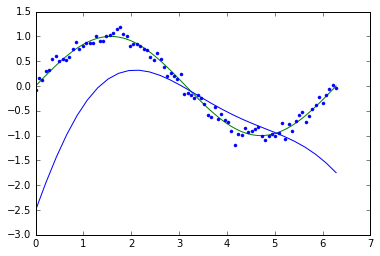

not complex
positive definite


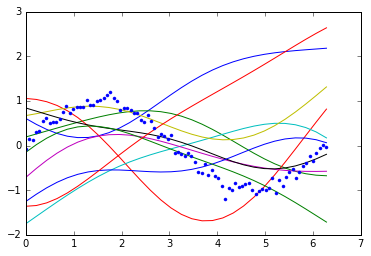

In [126]:
def plot_gp_reg(in_pts = 20, betai=0.2, test_max= 2*math.pi,
                uniform=False, plot_posteriors=True, plot_mean=True):
    xgt, tgt = draw_samples(in_pts, betai, uniform)
    sigma = find_sigma_min(xgt, tgt, in_pts)
    print('sigma-min: ', sigma, ' ', type(sigma))
    cn = get_gp_covar(xgt, tgt, betai, sigma)
    eigen_vals = np.linalg.eigvals(cn)
    tmp_product = 1
    [tmp_product*eigen_val for eigen_val in eigen_vals]
    #print('eigen values: {0}:{1}, {2}:{3}, p: {4}'.format(np.min(eigen_vals), type(np.min(eigen_vals)),
    #                                                      np.max(eigen_vals), type(np.max(eigen_vals)),
    #                                                      tmp_product))
    #print(np.all(eigen_vals > 0))
    #print(type(cn))
    cni = np.linalg.inv(cn)

    x_test = np.linspace(0,test_max,30)
    plot_samples_posterior(xgt, tgt, cni, betai, 
                           x_test, sigma, plot_posteriors, plot_mean)

interact(plot_gp_reg,
         in_pts=(10, 100, 5),
         betai=(0,5.0,0.1),
         test_max=(math.pi, 4*math.pi, 0.1)
        )

         Current function value: 78.419006
         Iterations: 3
         Function evaluations: 33
         Gradient evaluations: 7


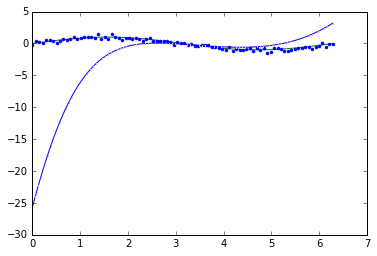

TypeError: plot_samples_posterior() missing 2 required positional arguments: 'plot_posteriors' and 'plot_mean'

<function __main__.plot_gp_reg>

In [90]:
def plot_gp_reg(in_pts = 88, betai=0.2, test_max= 2*math.pi,
                uniform=True, plot_posteriors=True, plot_mean=False):
    xgt, tgt = draw_samples(in_pts, betai, uniform)
    sigma = find_sigma_min(xgt, tgt, in_pts)
    cn = get_gp_covar(xgt, tgt, betai, sigma)
    cn = cn + 1e-6*np.eye(in_pts)
    cni = np.linalg.inv(cn)
    x_test = np.linspace(0,test_max,100)
    t_test = np.array([get_predictions(xgt, tgt, cni, betai, xx, sigma) 
                       for xx in x_test])
    t_test = t_test.reshape(-1, 2)
    plot_sin()
    plt.plot(xgt, tgt, '.b')
    plt.plot(x_test, t_test[:,0])
    plot_covar(x_test, t_test[:,0], t_test[:,1])
    plt.show()
    
    plot_samples_posterior(xgt, tgt, cni, betai, x_test, sigma)

interact(plot_gp_reg,
         in_pts=(2, 100, 1),
         betai=(0,5.0,0.1),
         test_max=(math.pi, 4*math.pi, 0.1)
        )

The sexy part is that the uncertainty is quite high where we haven't data and is low in the neighborhood of data.  
thats brings us to the second problem, why does this happen?

$$
\sigma^2(\xbnp) = c - \kt \inv{\Cn} \kb
$$

The second term is very negative in the regions of data since $\kt \inv{\Cn} \kb$ is high, which brings down the uncertainty

In [91]:
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of mtrand.RandomState instance
    multivariate_normal(mean, cov[, size])
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)
        Covariance matrix of the distribution. It must be symmetric and
        positive-semidefinite for proper sampling.
    size : int or tuple of ints, optional
        Given a shape of, for example

In [92]:
N=7
x,t = draw_samples(N)
A = np.square(x - x.T)
B = np.exp(-A/2.)
print('det(exp(A)): ',np.linalg.det(B))
print('exp(tr(A))', math.e**(A.trace()))
print('tr(A)', A.trace())
print('log(det(exp(A)))', math.log(np.linalg.det(B)))

det(exp(A)):  7.49570147816e-06
exp(tr(A)) 1.0
tr(A) 0.0
log(det(exp(A))) -11.801180837973185


In [93]:
N=35
x,t = draw_samples(N)
B = np.square(x - x.T)
A = np.exp( - B/2.)
res1 = sp_optimize.fmin_cg(f, (1.), args=(A, B, t, N))
print('res1 = ', res1)

         Current function value: 60.625385
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 12
res1 =  [ 0.00015758]
